# EJERCICIOS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.utils import to_categorical
from keras.applications import ResNet101V2
from keras.applications.resnet_v2 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing import image_dataset_from_directory


## EJERCICIO 1

Crea tu propia CNN desde el principio e intenta conseguir la mayor exactitud posible con MNIST (por ejemplo 99% en el conjunto de prueba).

En vez de crear un conjunto de validación en el fit indica que porcentaje (10%) vas a usar para el conjunto de validación (validation_split)

Por ejemplo:
* 2 capas convolucionales (32 filtros)
* 1 capa maxpool
* 2 capas convolucionales (64 filtros)
* 1 capa maxpool
* 1 capa flatten
* 1 capa dropout
* 1 capa densa oculta
* 1 capa dropout
* 1 capa densa de salida

Usá como función de pérdida categorical_crossentropy.

Ten en cuenta que:
* sparse_categorical_crossentropy: se usa cuando las etiquetas de las clases están representadas como enteros (codificación entera), por ejemplo: 0, 1, 2, 3, ... para n clasess
* categorical_crossentropy: se usa cuando las etiquetas están representadas en formato one-hot encoded.

Tal y com tenemos los datos podemos usar directamente sparse_categorical_crossentropy, para poder aplicar categorical_crossentropy hay que hacer una transformación en y (to_categorical).

Haz una predicción y muestra la imagen con la etiqueta real y la predicha.

In [ ]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalización (escalar los valores de píxeles a [0,1])
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Añadir una dimensión extra para las capas convolucionales
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Construcción del modelo CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo con 10% de validación
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.1)

# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

# Predicción en una imagen de prueba
index = np.random.randint(0, x_test.shape[0])
sample_image = x_test[index]
sample_label = y_test[index]

pred = np.argmax(model.predict(np.expand_dims(sample_image, axis=0)))

plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Real: {sample_label}, Predicción: {pred}")
plt.axis("off")
plt.show()


/home/iabd/miniconda3/envs/iabd/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.8224 - loss: 0.5408 - val_accuracy: 0.9847 - val_loss: 0.0454
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9720 - loss: 0.0940 - val_accuracy: 0.9907 - val_loss: 0.0337
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9811 - loss: 0.0656 - val_accuracy: 0.9913 - val_loss: 0.0292
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9835 - loss: 0.0561 - val_accuracy: 0.9915 - val_loss: 0.0307
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9858 - loss: 0.0482 - val_accuracy: 0.9937 - val_loss: 0.0268
Epoch 6/15
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9874 - loss: 0.0416

## EJERCICIO 2

Haz unas fotos con tu movil (a objetos) y usando alguno de los modelos que existen (por ejemplo ResNet101V2). Tendrás de adecuar el tamaño de las fotos antes de intentar predecir que es lo que has fotografiado.

Tendrás que investigar como añadir cargar tus images, un buen sitio por donde empezar es por la documentación de Keras para ResNEt101V2.

179518384/179518384 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


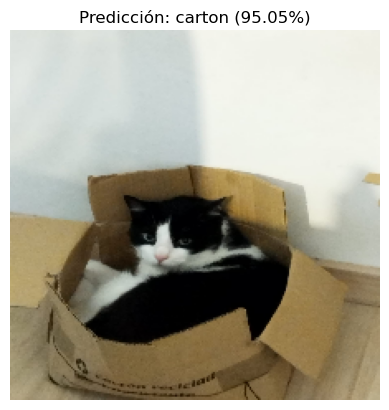

1. carton: 95.05%
2. skunk: 4.14%
3. guinea_pig: 0.16%


In [3]:
#  Cargar el modelo preentrenado
model = ResNet101V2(weights="imagenet")

img_path = "mika.jpg" 
img = image.load_img(img_path, target_size=(224, 224))  # Redimensionar a 224x224

# Convertir a array de NumPy y preprocesar
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Agregar dimensión batch
img_array = preprocess_input(img_array)  # Normalizar la imagen para ResNet

# Hacer la predicción
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)[0]  # Top-3 predicciones

#  Mostrar la imagen y los resultados
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicción: {decoded_predictions[0][1]} ({decoded_predictions[0][2]*100:.2f}%)")
plt.show()

# Mostrar las 3 mejores predicciones
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}. {label}: {score*100:.2f}%")


## EJERCICIO 3

El dataset food101 es un conjunto de datos consta de 101 categorías de alimentos, con 101000 imágenes. Para cada clase, se proporcionan 250 imágenes de prueba revisadas manualmente, así como 750 imágenes de entrenamiento. A propósito, las imágenes de entrenamiento no se limpiaron y, por lo tanto, aún contienen cierta cantidad de ruido. Esto viene principalmente en forma de colores intensos y, a veces, etiquetas incorrectas. Todas las imágenes se redimensionaron para tener una longitud lateral máxima de 512 píxeles.
* Carga el conjunto de imagenes: entrenamiento, validación (coge la mitad de los datos de prueba) y prueba (coge la otra mitad de los datos de prueba)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añade más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambia el tamaño para que sea adecuado para el modelo, normaliza...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2): coge todo menos la última capa y añade una capa globalaveragepooling y la capa dense de salida. En este caso utiliza como función de pérdida sparse_categorical_crossentropy
* Busca una imagen de comida en Internet y haz una predicción

Por defecto tensorflow busca y descarga los dato en:
* Linux/Mac: ~/tensorflow_datasets/
* Windows: C:\Users\<usuario>\tensorflow_datasets\

Los datos puedes copiarlo de mi disco duro o descarlos, pero son 5.12GB

In [13]:
dataset, info = tfds.load('food101', with_info=True, as_supervised=True)

print(info)

train_dataset = dataset['train']
validation_dataset = dataset['validation']


val_size = int(0.5 * len(list(validation_dataset))) 

val_dataset = validation_dataset.take(val_size)
test_dataset = validation_dataset.skip(val_size)


ERROR:absl:Failed to construct dataset food101


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/iabd/miniconda3/envs/iabd/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_20823/236743419.py", line 1, in <module>
    dataset, info = tfds.load('food101', with_info=True, as_supervised=True)
  File "/home/iabd/miniconda3/envs/iabd/lib/python3.9/site-packages/tensorflow_datasets/core/api_utils.py", line 52, in disallow_positional_args_dec
  File "/home/iabd/miniconda3/envs/iabd/lib/python3.9/site-packages/tensorflow_datasets/core/registered.py", line 297, in load
    # abstract methods.
  File "/home/iabd/miniconda3/envs/iabd/lib/python3.9/site-packages/tensorflow_datasets/core/registered.py", line 169, in builder
  File "/home/iabd/miniconda3/envs/iabd/lib/python3.9/site-packages/tensorflow_datasets/core/api_utils.py", line 52, in disallow_positional_args_dec
  File "/home/iabd/miniconda3/envs/iabd/lib/python3.9/site-packag

In [ ]:
# no me deja cargarlo de otra forma
dataset_dir = os.path.expanduser("~/Descargas/food101")

train_data = image_dataset_from_directory(
    os.path.join(dataset_dir, "train"),
    image_size=(224, 224),
    batch_size=32,
    label_mode="int"
)

test_data = image_dataset_from_directory(
    os.path.join(dataset_dir, "test"),
    image_size=(224, 224),
    batch_size=32,
    label_mode="int"
)


class_names = train_data.class_names
num_classes = len(class_names)
print(f"Número de clases: {num_classes}")
print(f"Clases: {class_names}")


Dl Completed...: 0 url [00:00, ? url/s]
Extraction completed...: 0 file [00:00, ? file/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]
Dl Completed...: 0 url [00:00, ? url/s]


Shuffling and writing examples to /home/iabd/tensorflow_datasets/food101/1.0.0.incompleteU0C6AH/food101-train.tfrecord


Computing statistics...:   0%|          | 0/1 [00:00<?, ? split/s]WARNING:absl:Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.
2025-01-28 03:34:57.207681: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Error in user-defined function passed to ParallelMapDatasetV2:299 transformation with iterator: Iterator::Root::Prefetch::ParallelMapV2: Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
ERROR:absl:food101's info() property specifies split train, but it doesn't seem to have been generated. Please ensure that the data was downloaded for this split and re-run download_and_prepare.
Computing statistics...:   0%|          | 0/1 [00:00<?, ? split/s]


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Error in user-defined function passed to ParallelMapDatasetV2:299 transformation with iterator: Iterator::Root::Prefetch::ParallelMapV2: Input is empty.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

In [ ]:
# Convertir test_data en una lista para dividirlo
test_data_list = list(test_data)

# Dividir la mitad para validación y la otra para prueba
split_idx = len(test_data_list) // 2
val_data = tf.data.Dataset.from_tensor_slices(test_data_list[:split_idx])
test_data = tf.data.Dataset.from_tensor_slices(test_data_list[split_idx:])


In [ ]:
class_names = info.features["label"].names

def show_images(dataset, num_images=6):
    plt.figure(figsize=(10, 6))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(2, 3, i+1)
        plt.imshow(image.numpy())
        plt.title(class_names[label.numpy()])
        plt.axis("off")
    plt.show()

show_images(train_data)


In [ ]:
IMG_SIZE = (224, 224)

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)  # Redimensionar
    image = tf.cast(image, tf.float32) / 255.0  # Normalizar
    return image, label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)  # Espejo horizontal
    image = tf.image.random_rotation(image, 0.2)  # Rotación aleatoria
    image = tf.image.random_zoom(image, (0.9, 1.1))  # Zoom aleatorio
    return preprocess(image, label)

# Aplicar preprocesamiento
train_data = train_data.map(augment).batch(32).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_data = val_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False, weights="imagenet")

# Congelar pesos del modelo base
base_model.trainable = False

# Construir el modelo
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(101, activation="softmax")  # 101 clases de comida
])

# Compilar el modelo
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Entrenar el modelo
history = model.fit(train_data, validation_data=val_data, epochs=10)


In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")


In [ ]:
import requests
from PIL import Image

# Descargar imagen de comida
img_url = "https://upload.wikimedia.org/wikipedia/commons/1/14/Pasta_Dish.jpg"
img_path = "comida.jpg"
response = requests.get(img_url, stream=True)
with open(img_path, "wb") as f:
    f.write(response.content)

# Cargar la imagen
img = Image.open(img_path)
img = img.resize(IMG_SIZE)
img_array = np.array(img) / 255.0  # Normalizar
img_array = np.expand_dims(img_array, axis=0)  # Añadir batch

# Hacer la predicción
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

# Mostrar imagen con la predicción
plt.imshow(img)
plt.title(f"Predicción: {predicted_class}")
plt.axis("off")
plt.show()


Probar en clase

## EJERCICIO 4

Repite el ejercicio pero para otros datos (tienes conjuntos de datos en https://www.tensorflow.org/datasets/catalog/overview?hl=es-419 en el apartado image classificación, por ejemplo puedes usar stanford_dogs) y utilizando otra de las redes conocidas que no se haya utilizado todavía.
Para cargar los datos en este caso vas a descargar las imagnes a tu ordenador y cargarlos desde ahi (descargar la carpeta al ordenador y luego cargarlo desde la carpeta con python (mage_dataset_from_director)):

* Carga el conjunto de imagenes (entrenamiento, validación y pruebas)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añadir más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambiar el tamaño para que sea adecuado para el modelo, normalizar...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2)
* Busa una imagen en Internet y haz una predicción

In [2]:
DATASET_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
DATASET_DIR = "stanford_dogs"

# Descargar dataset
if not os.path.exists(DATASET_DIR):
    os.system(f"wget {DATASET_URL} -O images.tar")
    os.system("mkdir -p stanford_dogs && tar -xf images.tar -C stanford_dogs")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dataset = image_dataset_from_directory(
    "stanford_dogs",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_dataset = image_dataset_from_directory(
    "stanford_dogs",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# nombres de clases
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Número de clases: {num_classes}")

# ver algunas imágenes 
def show_images(dataset, num_images=6):
    plt.figure(figsize=(10, 6))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            plt.subplot(2, 3, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i].numpy()])
            plt.axis("off")
    plt.show()

show_images(train_dataset)

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)  # Redimensionar
    image = tf.cast(image, tf.float32) / 255.0  # Normalizar
    return image, label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)  # Espejo horizontal
    image = tf.image.rot90(image, np.random.choice([0, 1, 2, 3]))  # Rotación aleatoria
    image = tf.image.random_zoom(image, (0.9, 1.1))  # Zoom aleatorio
    return preprocess(image, label)

train_dataset = train_dataset.map(augment).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.map(preprocess).prefetch(tf.data.AUTOTUNE)

base_model = tf.keras.applications.EfficientNetB0(input_shape=(224, 224, 3),
                                                  include_top=False, weights="imagenet")
base_model.trainable = False  # Congelar pesos

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation="softmax")  # 120 clases de perros
])

# Compilar modelo
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Entrenar el modelo 
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# Evaluar el modelo 
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Bichon_Fris%C3%A9_-_studdogbichon.jpg/800px-Bichon_Fris%C3%A9_-_studdogbichon.jpg"
img_path = "dog.jpg"

# Descargar imagen
response = requests.get(img_url, stream=True)
with open(img_path, "wb") as f:
    f.write(response.content)

# Cargar la imagen y preprocesarla
img = Image.open(img_path).resize(IMG_SIZE)
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Añadir batch

# Predicción
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

# Mostrar imagen con la predicción
plt.imshow(img)
plt.title(f"Predicción: {predicted_class}")
plt.axis("off")
plt.show()


Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory stanford_dogs. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

## EJERCICIO 5

Sigue el tutorial de TensorFlow Style Transfer (https://homl.info/styletuto) hasta definir representaciones de contenido y estilo (hay que hacer sólo los primeros puntos, hasta el punto  Transferencia de estilo rápido usando TF-Hub (incluido)).

Haz algo parecido no igual (por lo menos cambia de imagenes).

Además tienes que poner comentarios para explicar con tus palabras lo que estas haciendo.

Realmente lo que esta haciendo es aplicar una capas convolucionales a una imagen, donde los filtros se han sacado de otra imagen.

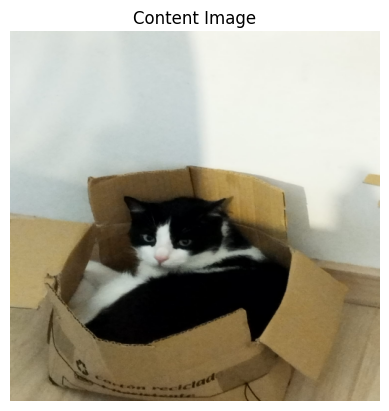

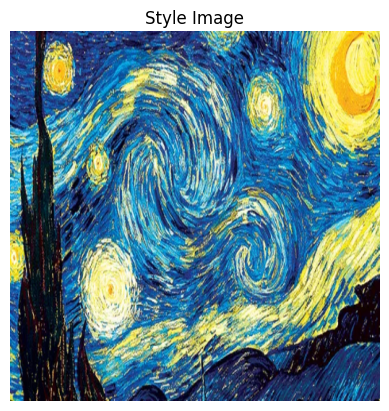

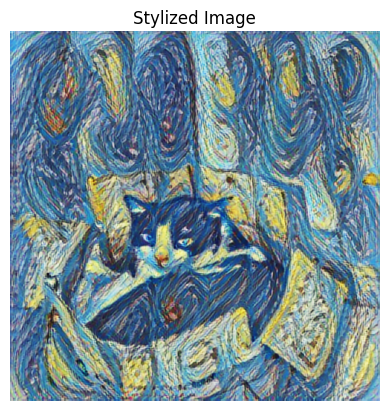

In [6]:
from PIL import Image

# Función para cargar y procesar la imagen
def load_img(path_to_img):
    max_dim = 512
    img = Image.open(path_to_img)
    img = img.convert('RGB')
    img = np.array(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (max_dim, max_dim))
    img = img[tf.newaxis, :]
    return img

# Función para mostrar la imagen
def show_img(img, title=None):
    img = np.squeeze(img, axis=0)
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Cargar imágenes de contenido y estilo
content_path = 'mika.jpg'
style_path = 'noche_estrellada.webp'

content_image = load_img(content_path)
style_image = load_img(style_path)

# Mostrar imágenes de contenido y estilo
show_img(content_image, 'Content Image')
show_img(style_image, 'Style Image')

# Cargar el modelo de transferencia de estilo de TF-Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Aplicar el modelo a las imágenes de contenido y estilo
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Mostrar la imagen estilizada
show_img(stylized_image, 'Stylized Image')

## EJERCICIO 6

Crea un modelo sencillo que aplique un filtro personalizado a una imagen de contenido mediante una capa convolucional es un buen ejercicio para entender cómo funcionan las convoluciones en el procesamiento de imágenes.

Carga una imagen desde archivo preparala para se procesada por la red:
* Cargar la imagen (tf.keras.preprocessing.image.load_im)
* Convertir la imagen a un tensor de NumPy y redimensionarla:
    * tf.keras.preprocessing.image.img_to_array
    * tf.image.resize
* Añadir una dimensión de batch al tensor de la imagen (np.expand_dims)


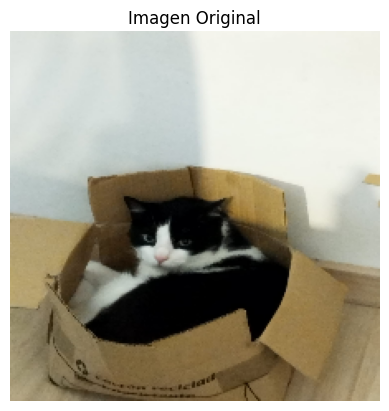

In [7]:
# Cargar la imagen
image_path = 'mika.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)

# Convertir la imagen a un tensor de NumPy y redimensionarla
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.image.resize(image_array, IMG_SIZE)

# Añadir una dimensión de batch al tensor de la imagen
image_array = np.expand_dims(image_array, axis=0)

# Mostrar la imagen original
plt.imshow(image_array[0].astype('uint8'))
plt.title("Imagen Original")
plt.axis("off")
plt.show()

Define un filtro personalizado para aplicar a la imagen. Los filtros son matrices pequeñas que modifican los píxeles de la imagen al aplicar la convolución.

Por ejemplo aquí tienes un filtro de bordes:

```python
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)
```
El filtro debe tener forma (altura, anchura, canales_entrada, canales_salida) (usa reshape)

In [9]:
# Definir un filtro personalizado para detectar bordes
filtro = np.array([
    [[[-1]], [[-1]], [[-1]]],
    [[[-1]], [[ 8]], [[-1]]],
    [[[-1]], [[-1]], [[-1]]]
], dtype=np.float32)

# Ajustar la forma del filtro a (altura, anchura, canales_entrada, canales_salida)
filtro = np.repeat(filtro, 3, axis=2)  # Repetir el filtro para los 3 canales de entrada (RGB)

Crea un modelo secuencial en Keras con una única capa convolucional que utilice tu filtro personalizado.

In [11]:
# Crear un modelo secuencial en Keras con una única capa convolucional que utilice el filtro personalizado
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding='same', input_shape=(224, 224, 3), use_bias=False, kernel_initializer=tf.constant_initializer(filtro))
])

# Aplicar el modelo a la imagen
filtered_image = model.predict(image_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Visualiza el resultado (muestra la imagen original y la imagen con el filtro y pon un título a cada imagen)

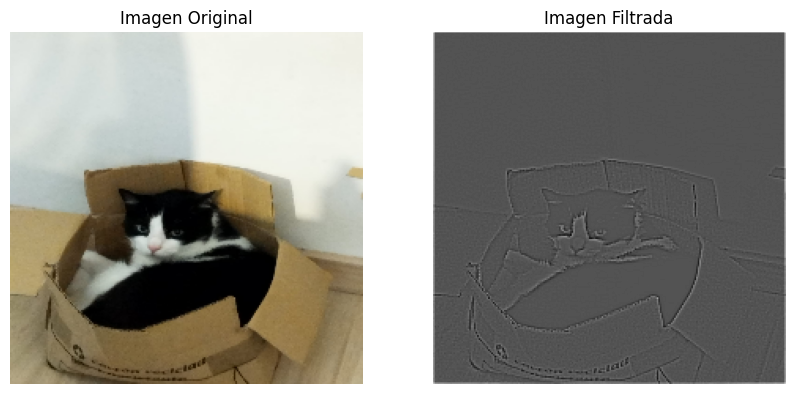

In [12]:

# Mostrar la imagen original y la imagen filtrada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array[0].astype('uint8'))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image[0, :, :, 0], cmap='gray')
plt.title("Imagen Filtrada")
plt.axis("off")

plt.show()

## EJERCICIO 7
Repite el ejercicio anterior con diferentes modelos y filtros:
* Prueba otro filtro (mostrar imagen original e imagen con filtro)
* Prueba con tres filtros a la vez (mostrar la imagen resultante de cada filtro)
* Prueba con tres filtros y dos capas convolucionales (mostrar imagen original e imagne con filtro)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


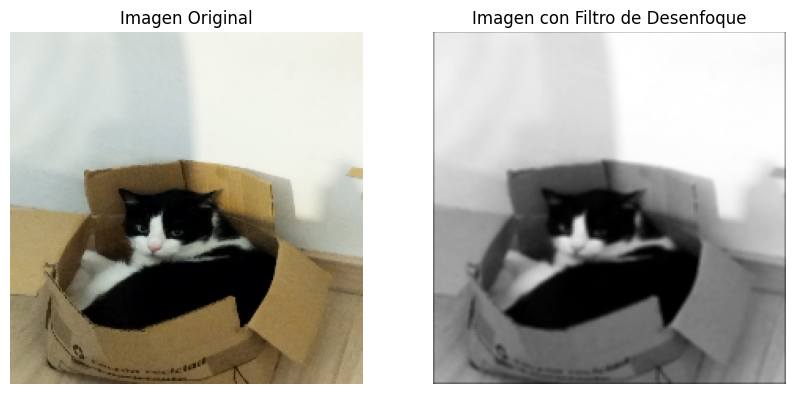

In [14]:
# Definir otro filtro personalizado (filtro de desenfoque)
filtro_desenfoque = np.array([
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]
], dtype=np.float32)

# Ajustar la forma del filtro a (altura, anchura, canales_entrada, canales_salida)
filtro_desenfoque = filtro_desenfoque.reshape((3, 3, 3, 1))

# Crear un modelo secuencial en Keras con una única capa convolucional que utilice el filtro de desenfoque
model_desenfoque = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding='same', input_shape=(224, 224, 3), use_bias=False, kernel_initializer=tf.constant_initializer(filtro_desenfoque))
])

# Aplicar el modelo a la imagen
filtered_image_desenfoque = model_desenfoque.predict(image_array)

# Mostrar la imagen original y la imagen con el filtro de desenfoque
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array[0].astype('uint8'))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_desenfoque[0, :, :, 0], cmap='gray')
plt.title("Imagen con Filtro de Desenfoque")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


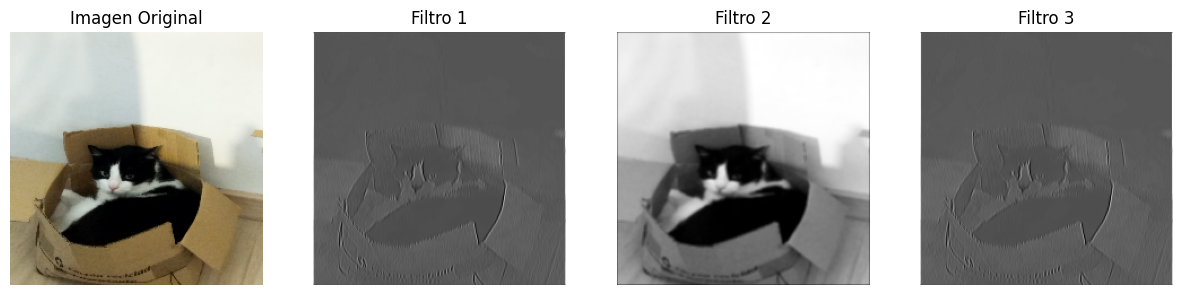

In [17]:
# Definir tres filtros personalizados
filtro_1 = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)

filtro_2 = np.array([
    [[0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111]],
    [[0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111]],
    [[0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111], [0.11111111, 0.11111111, 0.11111111]]
], dtype=np.float32)

filtro_3 = np.array([
    [[0, -1, 0], [-1, 4, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 4, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]
], dtype=np.float32)

filtro_1 = filtro_1.reshape((3, 3, 3, 1))
filtro_2 = filtro_2.reshape((3, 3, 3, 1))
filtro_3 = filtro_3.reshape((3, 3, 3, 1))

model_tres_filtros = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), padding='same', input_shape=(224, 224, 3), use_bias=False, kernel_initializer=tf.constant_initializer(np.concatenate([filtro_1, filtro_2, filtro_3], axis=-1)))
])

filtered_images = model_tres_filtros.predict(image_array)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(image_array[0].astype('uint8'))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(filtered_images[0, :, :, 0], cmap='gray')
plt.title("Filtro 1")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(filtered_images[0, :, :, 1], cmap='gray')
plt.title("Filtro 2")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(filtered_images[0, :, :, 2], cmap='gray')
plt.title("Filtro 3")
plt.axis("off")

plt.show()